# Retrieving data from OpenStreetMap

## What is OpenStreetMap?

:::{figure} images/osm-logo_256x256px.svg
:name: osm-logo
:alt: The logo of OpenStreetMap (OSM)

OpenStreetMap is a free and open map service, but - first and foremost - it is
a collaborative global effort to collect free and open geodata. *Source:
[wiki.openstreetmap.org](https://wiki.openstreetmap.org/wiki/Logos)*
:::

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) database and
project that aims at creating a free editable map of the world containing of
information about our environment. It contains data about streets, buildings,
different services, and landuse, to mention but a few.
The collected data is also basis for the map at [openstreetmap.org](https://openstreetmap.org/). 


:::{admonition} Contribute!
:class: note

You can also sign up as a contributor if you want to add to the database and
map or correct and improve existing data. Read more in the  [OpenStreetMap
Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).
:::


OSM has more than 8 million registered users who contribute around 4 million
changes daily.  Its database contains data that is described by [more than 7
billion nodes](http://wiki.openstreetmap.org/wiki/Stats) (that make up lines,
polygons and other objects).

While the most well-known side of OpenStreetMap is the map itself, that [we
have used as a background map](../lesson-5/static-maps), the project is much
more than that. OSM’s data can be used for many other purposes such as
**routing**, **geocoding**, **education**, and **research**. OSM is also widely
used for humanitarian response, e.g., in crisis areas (e.g. after natural
disasters) and for fostering economic development. Read more about humanitarian
projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM)
website](https://www.hotosm.org).



## Main tools in this lesson

### OSMnx

This week we will explore a Python package called
[OSMnx](https://github.com/gboeing/osmnx) that can be used to retrieve street
networks from OpenStreetMap, and construct, analyse, and visualise them. OSMnx
can also fetch data about Points of Interest, such as restaurants, schools, and
different kinds of services.  The package also includes tools to find routes on
a network downloaded from OpenStreetMap, and implements algorithms for finding
shortest connections for walking, cycling, or driving.


To get an overview of the capabilities of the package, watch the introductory
video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet
the developer: Introduction to OSMnx package by Geoff
Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing,
> and Visualizing Complex Street
> Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks)
> Computers, Environment and Urban Systems 65, 126-139.
> doi:10.1016/j.compenvurbsys.2017.05.004

[This
tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb)
provides a practical overview of OSMnx functionalities, and has also inspired
this AutoGIS lesson.


### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation//)
to manipulate and analyse the street network data retrieved from
OpenStreetMap. NetworkX is a Python package that can be used to create,
manipulate, and study the structure, dynamics, and functions of complex
networks. 


---


## Download and visualise OpenStreetMap data with OSMnx

A useful feature of OSMnx is its easy-to-use tools to download
[OpenStreetMap](http://www.openstreetmap.org) data via the project’s [OverPass
API](http://wiki.openstreetmap.org/wiki/Overpass_API).
In this section, we will learn how to download and visualise the street network
and additional data from OpenStreetMap covering an area of interest.


### Street network

The [`osmnx.graph`
module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph)
downloads data to construct a routable road network graph, based on an
user-defined area of interest. This area of interest can be specified, for
instance, using a place name, a bounding box, or a polygon.  Here, we will use
a placename for fetching data covering the Kamppi area in Helsinki, Finland. 

In the place name query, OSMnx uses the Nominatim Geocoding API. This means
that place names should exist in the OpenStreetMap database (run a test search
at [openstreetmap.org](https://www.openstreetmap.org/) or
[nominatim.openstreetmap.org](https://nomination.openstreetmap.org/)).

We will read an OSM street network using OSMnx’s
[graph_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place) function:

In [1]:
import osmnx

PLACE_NAME = "Marikina, Metro Manila, Philippines"
graph = osmnx.graph_from_place(PLACE_NAME)

Check the data type of the graph:

In [2]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a
[`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) object.


OSMnx’s graphs do not have a built-in method to plot them, but the package
comes with a function to do so:

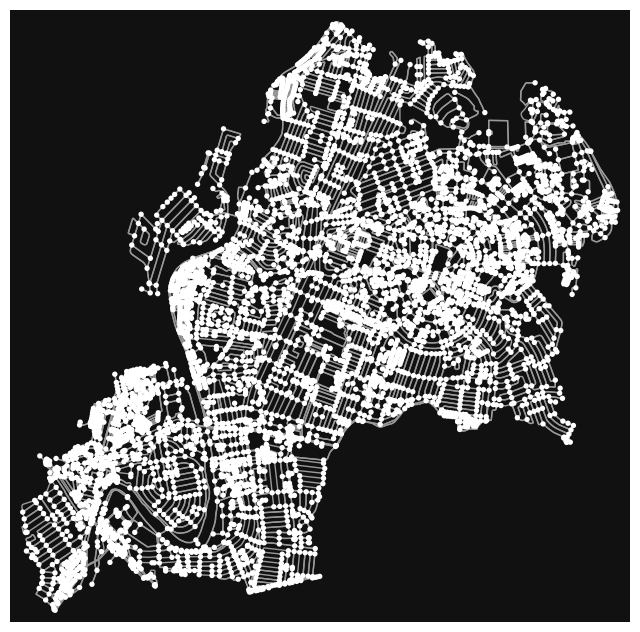

In [3]:
figure, ax = osmnx.plot_graph(graph)

Just as its GeoPandas and Pandas equivalents, `osmnx.plot_graph()` uses
matplotlib. The function returns a `(figure, axes)` tuple, that can be used to
modify the figure using all matplotlib functions we already got to know.

We can see that our graph contains nodes (the points) and edges (the
lines) that connects those nodes to each other.



### Convert a graph to `GeoDataFrame`s

The street network we just downloaded is a *graph*, more specifically a
`networkx.MultiDiGraph`. Its main purpose is to represent the topological
relationships between nodes and the links (edges) between them. Sometimes, it
is more convenient to have the underlying geodata in `geopandas.GeoDataFrame`s.
OSMnx comes with a convenient function that converts a graph into two geo-data
frames, one for nodes, and one for edges:
[`osmnx.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs).

In [4]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [5]:
nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
21322166,14.628756,121.080371,motorway_junction,3,POINT (121.08037 14.62876)
21322195,14.637735,121.097920,NaN,3,POINT (121.09792 14.63773)
21322197,14.642454,121.099739,NaN,4,POINT (121.09974 14.64245)
21322208,14.660102,121.104886,NaN,3,POINT (121.10489 14.66010)
21322209,14.659875,121.105381,NaN,4,POINT (121.10538 14.65987)


In [6]:
edges.head()

osmid  oneway lanes       highway reversed  \
u        v          key                                                    
21322166 8631651857 0       4308747    True     2  primary_link    False   
         32614373   0       4638278    True     2       primary    False   
21322195 8489619532 0     357121634   False     2      tertiary    False   
         8489619520 0    1178024567   False     2      tertiary     True   
21322197 32284894   0       4357068    True     2      tertiary    False   

                          length  \
u        v          key            
21322166 8631651857 0     19.055   
         32614373   0     92.463   
21322195 8489619532 0      6.322   
         8489619520 0      5.717   
21322197 32284894   0    264.153   

                                                                  geometry  \
u        v          key                                                      
21322166 8631651857 0    LINESTRING (121.08037 14.62876, 121.08033 14.6...   
         32614373   0    LINESTRING (121.08037 14.62876, 121.08008 14.6...   
21322195 8489619532 0    LINESTRING (121.09792 14.63773, 121.09786 14.6...   
         8489619520 0    LINESTRING (121.09792 14.63773, 121.09797 14.6...   
21322197 32284894   0    LINESTRING (121.09974 14.64245, 121.09871 14.6...   

                         ref                    name maxspeed width access  \
u        v          key                                                      
21322166 8631651857 0    NaN                     NaN      NaN   NaN    NaN   
         32614373   0     59          Marcos Highway       60   NaN    NaN   
21322195 8489619532 0    NaN         Guerilla Street       40   NaN    NaN   
         8489619520 0    NaN         Guerilla Street      NaN   NaN    NaN   
21322197 32284894   0    NaN  Eraño G. Manalo Street       40   NaN    NaN   

                        bridge service junction tunnel  
u        v          key                                 
21322166 8631651857 0      NaN     NaN      NaN    NaN  
         32614373   0      NaN     NaN      NaN    NaN  
21322195 8489619532 0      NaN     NaN      NaN    NaN  
         8489619520 0      NaN     NaN      NaN    NaN  
21322197 32284894   0      NaN     NaN      NaN    NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot
them using the same functions and tools as we have used before.



### Place polygon

Let’s also plot the polygon that represents our area of interest (Kamppi,
Helsinki). We can retrieve the polygon geometry using the
[osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf)
function.

In [7]:
# Get boundary of place name as geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

As the name of the function already tells us, it returns a GeoDataFrame object
based on the specified place name query.  Let’s still verify the data type:

In [8]:
type(area)

geopandas.geodataframe.GeoDataFrame

Let’s also have a look at the data:

In [9]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((121.07441 14.62807, 121.07445 14.627...",14.67579,14.617738,121.135023,121.074407,255795902,relation,146949,14.633108,121.099354,boundary,administrative,12,0.437997,city,Marikina,"Marikina, Eastern Manila District, Metro Manil..."


<Axes: >

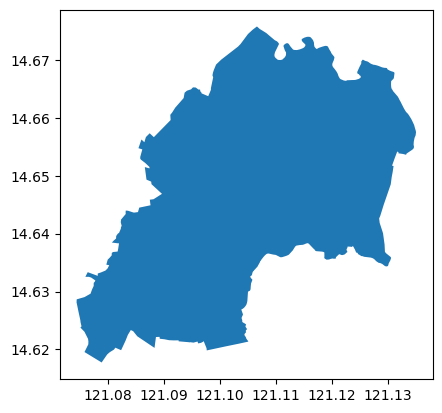

In [10]:
area.plot()

### Building footprints

Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by [OSM tags](https://wiki.openstreetmap.org/wiki/Map_features) and a place name, use [`osmnx.features_from_place()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_place) [geometries is soon deprecated - let's use features instead]. The tag to retrieve all [buildings](https://wiki.openstreetmap.org/wiki/Buildings) is `building = yes`.

In [11]:
buildings = osmnx.features_from_place(
    PLACE_NAME,
    {"building": True},
    which_result=1
)

In [12]:
len(buildings)

69744

In [13]:
buildings.head()

mapillary survey:date                    geometry  \
element_type osmid                                                         
node         255053696       NaN         NaN  POINT (121.08281 14.62217)   
             600643341       NaN         NaN  POINT (121.09680 14.62856)   
             661976394       NaN         NaN  POINT (121.09708 14.65630)   
             671855652       NaN         NaN  POINT (121.09448 14.62809)   
             671855709       NaN         NaN  POINT (121.09382 14.63474)   

                       addr:city addr:province building  \
element_type osmid                                        
node         255053696     Pasig  Metro Manila      yes   
             600643341  Marikina           NaN      yes   
             661976394  Marikina           NaN    civic   
             671855652       NaN           NaN      yes   
             671855709       NaN           NaN   public   

                                                   name addr:housename  \
element_type osmid                                                       
node         255053696   Clayton Industrial Corporation            NaN   
             600643341                          OLADECO            NaN   
             661976394  Bulwagang Pambarangay ng Tumana            NaN   
             671855652                           Urinal            NaN   
             671855709                              NaN            NaN   

                        addr:street historic  ... building:units roof:levels  \
element_type osmid                            ...                              
node         255053696          NaN      NaN  ...            NaN         NaN   
             600643341  J. P. Rizal      NaN  ...            NaN         NaN   
             661976394          NaN      NaN  ...            NaN         NaN   
             671855652          NaN      NaN  ...            NaN         NaN   
             671855709          NaN      NaN  ...            NaN         NaN   

                       building:roof brand:twitter residential man_made  \
element_type osmid                                                        
node         255053696           NaN           NaN         NaN      NaN   
             600643341           NaN           NaN         NaN      NaN   
             661976394           NaN           NaN         NaN      NaN   
             671855652           NaN           NaN         NaN      NaN   
             671855709           NaN           NaN         NaN      NaN   

                       loc_name shelter fuel:octane_80 ways  
element_type osmid                                           
node         255053696      NaN     NaN            NaN  NaN  
             600643341      NaN     NaN            NaN  NaN  
             661976394      NaN     NaN            NaN  NaN  
             671855652      NaN     NaN            NaN  NaN  
             671855709      NaN     NaN            NaN  NaN  

[5 rows x 194 columns]

As you can see, there are several columns in `buildings`. Each column contains
information about a specific tag that OpenStreetMap contributors have added.
Each tag consists of a key (the column name), and a values (for example
`building=yes` or `building=school`). Read more about tags and tagging
practices in the [OpenStreetMap
wiki](https://wiki.openstreetmap.org/wiki/Tags).

In [14]:
list(buildings.columns)

['mapillary',
 'survey:date',
 'geometry',
 'addr:city',
 'addr:province',
 'building',
 'name',
 'addr:housename',
 'addr:street',
 'historic',
 'name:tl',
 'start_date',
 'wikidata',
 'wikimedia_commons',
 'admin_level',
 'amenity',
 'name:en',
 'townhall:type',
 'fee',
 'unisex',
 'note',
 'source',
 'addr:housenumber',
 'addr:postcode',
 'railway',
 'addr:village',
 'wheelchair',
 'addr:street:corner',
 'building:levels',
 'shop',
 'description',
 'addr:place',
 'postal_code',
 'ref',
 'wikipedia',
 'operator',
 'email',
 'office',
 'opening_hours',
 'website',
 'healthcare',
 'healthcare:speciality',
 'height',
 'power',
 'shelter_type',
 'addr:town',
 'nodes',
 'denomination',
 'religion',
 'is_in:city',
 'is_in:zip',
 'layer',
 'construction',
 'operator:type',
 'source:url',
 'demolished',
 'leisure',
 'sport',
 'air_conditioning',
 'internet_access',
 'internet_access:fee',
 'public_transport',
 'station',
 'subway',
 'disused',
 'surface',
 'brand',
 'brand:en',
 'brand:ru',


### Points-of-interest

Point-of-interest (POI) is a generic concept that describes point locations
that represent places of interest. As `osmnx.features_from_place()` can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data. 


In OpenStreetMap, many POIs are described using the [`amenity`
tag](https://wiki.openstreetmap.org/wiki/Key:amenity).  We can, for example,
retrieve all restaurant locations by querying `amenity=restaurant`.

In [15]:
restaurants = osmnx.features_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants)

150

As we can see, there are quite many restaurants in the area.

Let’s explore what kind of attributes we have in our restaurants GeoDataFrame:

In [16]:
restaurants.columns.values

array(['addr:city', 'addr:street', 'amenity', 'cuisine', 'name',
       'geometry', 'addr:housenumber', 'addr:postcode', 'delivery',
       'diet:Pancit', 'opening_hours', 'phone', 'takeaway', 'website',
       'note', 'source', 'brand', 'brand:wikidata', 'brand:wikipedia',
       'restaurant:type', 'mapillary', 'addr:village', 'addr:housename',
       'level', 'addr:place', 'addr:street:corner', 'name:en',
       'addr:floor', 'capacity', 'smoking', 'brand:website',
       'payment:cash', 'internet_access', 'addr2:street', 'addr:quarter',
       'facebook', 'contact:phone', 'description', 'check_date', 'email',
       'branch', 'contact:facebook', 'delivery:partner', 'mobile',
       'payment:gcash', 'addr:town', 'building', 'nodes',
       'outdoor_seating', 'air_conditioning', 'image', 'building:levels',
       'operator', 'contact:email', 'outdoor', 'previously'], dtype=object)

As you can see, there is quite a lot of (potential) information related to the
amenities. Let’s subset the columns and inspect the data further. Can we
extract all restaurants’ names, address, and opening hours?

In [17]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:street",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head(10)

name  \
element_type osmid                                                          
node         600643322                                 Victory Panciteria   
             600643326                           Berganio Tabo Panciteria   
             600643330                                   Salud Panciteria   
             600643350                              Lola Helen Panciteria   
             601379192                                         Krung Thai   
             601379193                             Johnny's Fried Chicken   
             670274482                            Marikit Na Hapag Kainan   
             671855668                                   La Tora's Garden   
             681229395  Dolora's Hauz of Pancit Malabon (Barangka Branch)   
             681253924                              Red Paint Bar & Grill   

                            opening_hours addr:city  \
element_type osmid                                    
node         600643322                NaN  Marikina   
             600643326                NaN  Marikina   
             600643330                NaN  Marikina   
             600643350                NaN  Marikina   
             601379192                NaN  Marikina   
             601379193                NaN       NaN   
             670274482                NaN  Marikina   
             671855668                NaN       NaN   
             681229395  Mo-Su 08:00-20:00  Marikina   
             681253924                NaN       NaN   

                                        addr:street addr:housenumber  \
element_type osmid                                                     
node         600643322                  J. P. Rizal              NaN   
             600643326                  J. P. Rizal              NaN   
             600643330                  J. P. Rizal              NaN   
             600643350         Jose P. Rizal Street              425   
             601379192                    W. C. Paz              NaN   
             601379193                          NaN              NaN   
             670274482          Gil Fernando Avenue              NaN   
             671855668                          NaN              NaN   
             681229395  A. Bonifacio Ave., Barangka              130   
             681253924                          NaN              NaN   

                       addr:postcode                  addr:street  
element_type osmid                                                 
node         600643322           NaN                  J. P. Rizal  
             600643326           NaN                  J. P. Rizal  
             600643330           NaN                  J. P. Rizal  
             600643350           NaN         Jose P. Rizal Street  
             601379192          1800                    W. C. Paz  
             601379193           NaN                          NaN  
             670274482           NaN          Gil Fernando Avenue  
             671855668           NaN                          NaN  
             681229395          1803  A. Bonifacio Ave., Barangka  
             681253924           NaN                          NaN

:::{tip}
if some of the information needs an update, head over to [openstreetmap.org](https://openstreetmap.org) and edit the source data!
:::



### Parks and green areas

Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap,
[parks hould be tagged](https://wiki.openstreetmap.org/wiki/Map_features) as
`leisure = park`.  Smaller green areas (*puistikot*) are sometimes also tagged
`landuse = grass`. We can combine multiple tags in one data query.

In [18]:
parks = osmnx.features_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

In [19]:
parks.head()

leisure                              name  \
element_type osmid                                                 
node         671855661    park                       Butiki Park   
             671855662    park                      Womans' Park   
way          4794369      park  Marikina-Yeongdo Friendship Park   
             5169095      park                      Freedom Park   
             5644353      park                      Parang Plaza   

                                                                 geometry  \
element_type osmid                                                          
node         671855661                         POINT (121.09457 14.62873)   
             671855662                         POINT (121.09456 14.62895)   
way          4794369    POLYGON ((121.11645 14.65053, 121.11655 14.650...   
             5169095    POLYGON ((121.09786 14.63273, 121.09782 14.633...   
             5644353    POLYGON ((121.11199 14.65891, 121.11177 14.659...   

                       addr:city addr:street   place  \
element_type osmid                                     
node         671855661       NaN         NaN     NaN   
             671855662       NaN         NaN     NaN   
way          4794369         NaN         NaN     NaN   
             5169095    Marikina         NaN     NaN   
             5644353         NaN         NaN  square   

                                                                    nodes  \
element_type osmid                                                          
node         671855661                                                NaN   
             671855662                                                NaN   
way          4794369    [30760101, 9852604799, 9852604798, 30760154, 4...   
             5169095    [35869094, 35869080, 35869085, 35869089, 35869...   
             5644353    [42001376, 42001515, 42001323, 42001352, 42001...   

                                                 name:en        name:ko  \
element_type osmid                                                        
node         671855661                               NaN            NaN   
             671855662                               NaN            NaN   
way          4794369    Marikina-Yeongdo Friendship Park  마리키나-영도구 우호공원   
             5169095                                 NaN            NaN   
             5644353                                 NaN            NaN   

                       source landuse source:name source_ref  dog operator  \
element_type osmid                                                           
node         671855661    NaN     NaN         NaN        NaN  NaN      NaN   
             671855662    NaN     NaN         NaN        NaN  NaN      NaN   
way          4794369      NaN     NaN         NaN        NaN  NaN      NaN   
             5169095      NaN     NaN         NaN        NaN  NaN      NaN   
             5644353      NaN     NaN         NaN        NaN  NaN      NaN   

                       addr:province previously ways type  
element_type osmid                                         
node         671855661           NaN        NaN  NaN  NaN  
             671855662           NaN        NaN  NaN  NaN  
way          4794369             NaN        NaN  NaN  NaN  
             5169095             NaN        NaN  NaN  NaN  
             5644353             NaN        NaN  NaN  NaN

<Axes: >

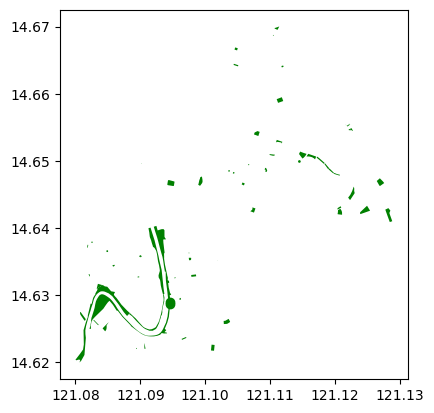

In [20]:
parks.plot(color="green")

### Plotting the data

Let’s create a map out of the streets, buildings, restaurants, and the area polygon.

C:\Users\Kurt\AppData\Local\Temp\ipykernel_11740\841661015.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


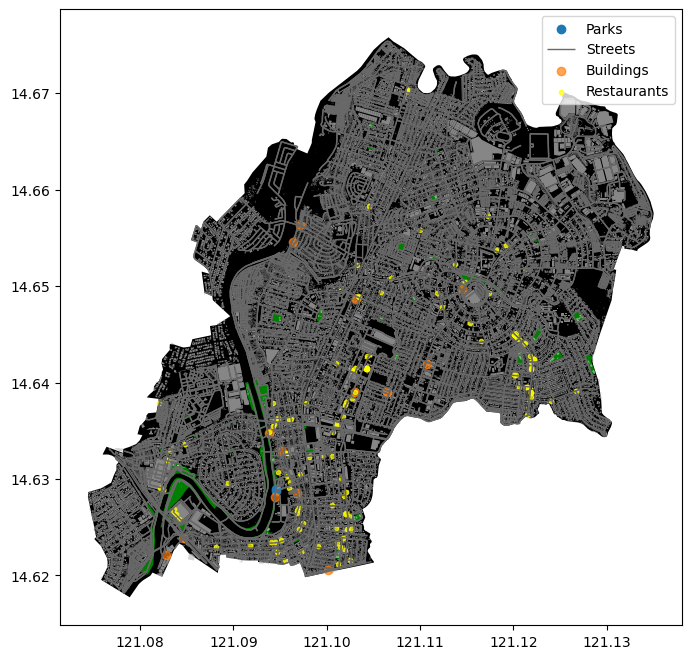

In [21]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black", label="City Border")

# Plot parks
parks.plot(ax=ax, facecolor="green", label="Parks")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray", label="Streets")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7, label="Buildings")

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10, label="Restaurants")

# Add legend
ax.legend()

Cool! Now we have a map where we have plotted the restaurants, buildings,
streets and the boundaries of the selected region of ‘Kamppi’ in Helsinki. And
all of this required only a few lines of code. Pretty neat! 



:::{admonition} Check your understanding
:class: hint

Retrieve OpenStreetMap data from some other area! Download these elements using
OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to geo-data frame using
  `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()`
  and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data
from the API!*
:::

C:\Users\Kurt\AppData\Local\Temp\ipykernel_11740\2319712649.py:53: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


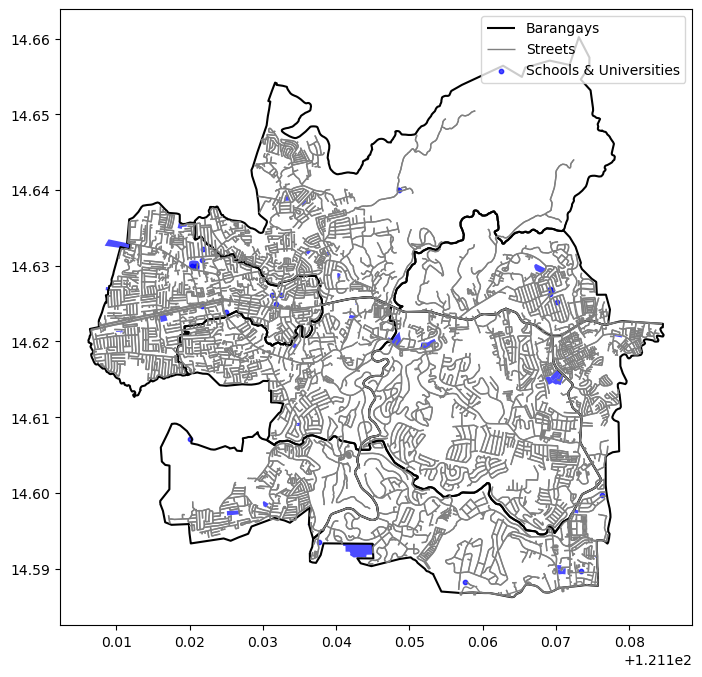

In [25]:
# Specify the name that is used to seach for the data. Check that the place
# name is valid from https://nominatim.openstreetmap.org/ui/search.html
MY_PLACES = [
    "Cupang, Antipolo", 
    "Mayamot, Antipolo",
    "Mambugan, Antipolo",
    # "San Juan, Antipolo",
    "Santa Cruz, Antipolo",
    "Bagong Nayon, Antipolo",
    # "Inarawan, Antipolo",
    # "San Luis, Antipolo",
    # "San Isidro, Antipolo",
    # "San Jose, Antipolo",
    # "Calawis, Antipolo",
    # "Dalig, Antipolo",
    # "San Roque, Antipolo",
    # "Beverly Hills, Antipolo",
    "Dela Paz, Antipolo",
    "Muntindilaw, Antipolo"
]

# Get street network
graph = osmnx.graph_from_place(
    MY_PLACES,
    simplify=True
)

intersections, streets = osmnx.graph_to_gdfs(graph)

# Get building footprints
schools = osmnx.features_from_place(
    MY_PLACES,
    {"amenity": ["college", "school", "university"]}
)

# Get borders of barangays
border = osmnx.geocode_to_gdf(
    MY_PLACES
)

border["border"] = border.exterior

border.set_geometry("border", inplace=True)

# Plot the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
border.plot(ax=ax, edgecolor="black", label="Barangays")
streets.plot(ax=ax, linewidth=1, edgecolor="grey", label="Streets")
schools.plot(ax=ax, color="blue", alpha=0.7, markersize=10, label="Schools & Universities")

ax.legend()



## Advanced reading

To analyse OpenStreetMap data over large areas, it is often more efficient and
meaningful to download the data all at once, instead of separate queries to the
API. Such data dumps from OpenStreetMap are available in various file formats,
OSM [Protocolbuffer Binary
Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of
them. Data extracts covering whole countries and continents are available, for
instance, at [download.geofabrik.de](https://download.geofabrik.de/).

[Pyrosm](https://pyrosm.readthedocs.io/) is a Python package for reading
OpenStreetMap data from PBF files into `geopandas.GeoDataFrames`. Pyrosm makes
it easy to extract road networks, buildings, Points of Interest (POI), landuse,
natural elements, administrative boundaries and much more - similar to OSMnx,
but taylored to analyses of large areas.  While OSMnx reads the data from the
Overpass API, pyrosm reads the data from a local PBF file.

Read more about fetching and using pbf files as a source for analysing
OpenStreetMap data in Python from the [pyrosm
documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).